In [1]:
import hameg_trb 
import hameg_lv  
import phidrive
import micos_eco
import wallplugs
import numpy as np 
from matplotlib import pyplot as plt
# scope?

import time

#import ROOT
import os
from my_utils import *
#import fst
import scalers

def power_cycle_usb():
  wallplugs.a_off()
  time.sleep(3)
  wallplugs.a_on()
  time.sleep(3)
    
def power_cycle_micos():
  wallplugs.b_off()
  time.sleep(3)
  wallplugs.b_on()
  time.sleep(6)
  micos_eco.send_cmd("1 1 setaxis")
  micos_eco.send_cmd("1 2 setaxis")
  micos_eco.send_cmd("2.0 1 setpitch")
  micos_eco.send_cmd("2.0 2 setpitch")
  micos_eco.cal()
  time.sleep(3)
  print("micos eco pos :")
  print(micos_eco.pos())
    

In [2]:
print("### test micos ###")
print(micos_eco.pos())
print("\n")

print("### test phidrive ###")
print(phidrive.get_angle())
print("\n")

print("### test HAMEG TRB ###")
hameg_trb.report()
print("\n")

print("### test HAMEG lv ###")
hameg_lv.report()
print("\n")

### test micos ###
(80.2, 71.0, 0.0)


### test phidrive ###
0.0


### test HAMEG TRB ###
device: /dev/ttyUSB_HAMEG_TRB
volt 24.000000 curr 0.580500 state 1
volt 23.999000 curr 0.580400 state 1
volt 2.000000 curr 0.026800 state 1
volt 1.500000 curr 0.248100 state 1


### test HAMEG lv ###
device: /dev/ttyUSB_HAMEG_LV
volt 4.000000 curr 0.426300 state 1
volt 5.000000 curr 0.346700 state 1
volt 5.000000 curr 0.083800 state 1
volt 5.000000 curr 0.000000 state 1




In [3]:
print(micos_eco.pos())

(80.2, 71.0, 0.0)


In [4]:
#micos_eco.move(y=100,x=100) ## far side
#micos_eco.move(y=0,x=100) ## units in mm
#micos_eco.move(y=100,x=0) ## units in mm
#micos_eco.move(y=70,x=0) ## strahlhoehe
#micos_eco.move(x=0,y=0) ## parking pos

In [5]:
#micos_eco.move(x=18,y=39) ## maximum of diamond rate in beam 
#micos_eco.move(x=18+x_offset,y=39+y_offset) ## maximum of diamond rate in beam 

In [6]:


#X = np.arange(73, 85, 1)
#X = [18+x_offset]
#Y = np.arange(79-2, 69+3, 2)
#Y = np.arange(69-6, 69+7, 2)
#Y = [71]

#X = np.arange(73, 85, 1)

X = [78.5]
Y = np.arange(71-6, 71+7, 1)

dut_chan = 2 # ufsd in Padiwa
trig_chan = 30 # alberto Scintillator

rates = np.zeros(( len(Y) , len(X)))
dut_rates = np.zeros(( len(Y) , len(X)))
trigger_rates = np.zeros(( len(Y) , len(X)))


poll_acq_time = 1
acq_time=35


trigger_rate_threshold=2000

#print(rates)

i=0
j=0
for y in Y:
  j=0
  for x in X:
    micos_eco.move(x=x,y=y)
    
    ### wait for spill break
    while True:
      curr_rates = scalers.scaler_rate("0x0351",[dut_chan,trig_chan],poll_acq_time)
      scint_rate = curr_rates[1]
      if scint_rate < trigger_rate_threshold*poll_acq_time:
        print("## spill break ##")
        break
      else:
        print(":", end=" ")
        
    ### wait for spill start
    while True:
      curr_rates = scalers.scaler_rate("0x0351",[dut_chan,trig_chan],poll_acq_time)
      scint_rate = curr_rates[1]
      if scint_rate > trigger_rate_threshold*poll_acq_time:
        print("## spill start ##")
        break
      else:
        print(".", end=" ")
        
    curr_rates = scalers.scaler_rate("0x0351",[dut_chan,trig_chan],acq_time)
    scint_rate = curr_rates[1]
    dut_rate = curr_rates[0]
    rates[i,j] = dut_rate/scint_rate
    dut_rates[i,j] = dut_rate
    trigger_rates[i,j] = scint_rate
    print("pos: x: {:f} y: {:f}".format(x,y))
    print("scint_rate: {:f}".format(scint_rate))
    print("dut_rate: {:f}".format(dut_rate))
    print("dut/trigger rate: {:f}".format( dut_rate/(scint_rate+0.001)))
    
    j+=1
  i+=1

print("scan finished")

print(rates)

(78.5, 65.0, 0.0)
done
## spill break ##
## spill start ##
pos: x: 78.500000 y: 65.000000
scint_rate: 1062981.000000
dut_rate: 48782.000000
dut/trigger rate: 0.045892
(78.5, 66.0, 0.0)
done
: : : : : : : : : : : : : : : : : : : : : : : : : ## spill break ##
. . . . . . . . . . . ## spill start ##
pos: x: 78.500000 y: 66.000000
scint_rate: 1066148.000000
dut_rate: 66670.000000
dut/trigger rate: 0.062534
(78.5, 67.0, 0.0)
done
: : : : : : : : : : : : : : : : : : : : : : : : : ## spill break ##
. . . . . . . . . . . . ## spill start ##
pos: x: 78.500000 y: 67.000000
scint_rate: 1065780.000000
dut_rate: 93950.000000
dut/trigger rate: 0.088151
(78.5, 68.0, 0.0)
done
: : : : : : : : : : : : : : : : : : : : : : : : : ## spill break ##
. . . . . . . . . . . ## spill start ##
pos: x: 78.500000 y: 68.000000
scint_rate: 1049250.000000
dut_rate: 106739.000000
dut/trigger rate: 0.101729
(78.5, 69.0, 0.0)
done
: : : : : : : : : : : : : : : : : : : : : : : : : : ## spill break ##
. . . . . . . . . . 

saving to /workdir/jupyter/beam_profile_w_scalers_data/000.svg
saving to /workdir/jupyter/beam_profile_w_scalers_data/000.pickle


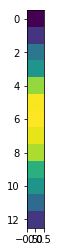

saving to /workdir/jupyter/beam_profile_w_scalers_data/001.svg
saving to /workdir/jupyter/beam_profile_w_scalers_data/001.pickle


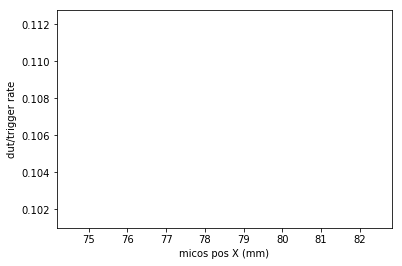

saving to /workdir/jupyter/beam_profile_w_scalers_data/002.svg
saving to /workdir/jupyter/beam_profile_w_scalers_data/002.pickle


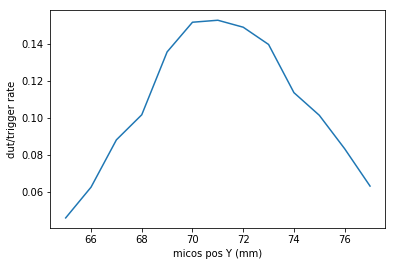

saving to /workdir/jupyter/beam_profile_w_scalers_data/relative_rates_matrix.pickle
saving to /workdir/jupyter/beam_profile_w_scalers_data/dut_rates_matrix.pickle
saving to /workdir/jupyter/beam_profile_w_scalers_data/trigger_rates_matrix.pickle
saving to /workdir/jupyter/beam_profile_w_scalers_data/X_mm.pickle
saving to /workdir/jupyter/beam_profile_w_scalers_data/Y_mm.pickle


In [7]:
clear_data_dir()

plt.imshow(rates)
show(plt)

plt.plot(X,sum(rates)/len(Y))
plt.xlabel("micos pos X (mm)")
plt.ylabel("dut/trigger rate")
#plt.ylim(0,0.03)
show(plt)

plt.plot(Y,sum(rates.transpose())/len(X))
plt.xlabel("micos pos Y (mm)")
plt.ylabel("dut/trigger rate")
#plt.ylim(0,0.03)
show(plt)

pickle_this(rates,"relative_rates_matrix")
pickle_this(dut_rates,"dut_rates_matrix")
pickle_this(trigger_rates,"trigger_rates_matrix")
pickle_this(X,"X_mm")
pickle_this(Y,"Y_mm")

saving to /workdir/jupyter/beam_profile_w_scalers_data/008.svg
saving to /workdir/jupyter/beam_profile_w_scalers_data/008.pickle


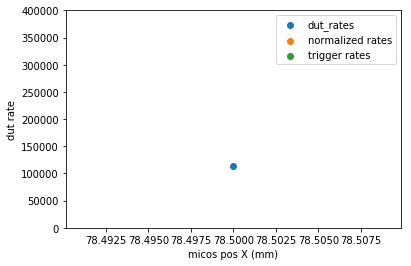

saving to /workdir/jupyter/beam_profile_w_scalers_data/009.svg
saving to /workdir/jupyter/beam_profile_w_scalers_data/009.pickle


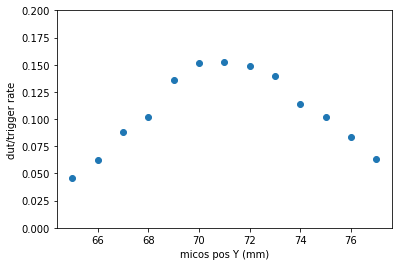

In [13]:
plt.scatter(X,sum(dut_rates)/len(Y),label ="dut_rates")
plt.scatter(X,sum(rates)*10e5, label ="normalized rates")
plt.scatter(X,sum(trigger_rates)*4e-1, label ="trigger rates")
plt.xlabel("micos pos X (mm)")
plt.ylabel("dut rate")
plt.ylim(0,400000)
plt.legend()
show(plt)

plt.scatter(Y,sum(rates.transpose())/len(X))
plt.xlabel("micos pos Y (mm)")
plt.ylabel("dut/trigger rate")
plt.ylim(0,0.2)
#plt.ylim(0,0.03)
show(plt)

In [14]:
archive(label="Y_Si_after_moving_to_front")

from IPython.display import Audio

sound_file = './blubb.wav'

Audio(sound_file, autoplay=True)